# 第一课 猫狗识别


<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#windows-10下的运行环境配置" data-toc-modified-id="windows-10下的运行环境配置-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>windows 10下的运行环境配置</a></span></li><li><span><a href="#第一个示例" data-toc-modified-id="第一个示例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>第一个示例</a></span><ul class="toc-item"><li><span><a href="#准备工作" data-toc-modified-id="准备工作-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#下载数据" data-toc-modified-id="下载数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>下载数据</a></span></li><li><span><a href="#训练数据" data-toc-modified-id="训练数据-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练数据</a></span></li><li><span><a href="#分析结果" data-toc-modified-id="分析结果-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>分析结果</a></span><ul class="toc-item"><li><span><a href="#验证效果" data-toc-modified-id="验证效果-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>验证效果</a></span></li></ul></li><li><span><a href="#调整学习速率" data-toc-modified-id="调整学习速率-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>调整学习速率</a></span></li></ul></li><li><span><a href="#提升模型" data-toc-modified-id="提升模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>提升模型</a></span><ul class="toc-item"><li><span><a href="#数据增强" data-toc-modified-id="数据增强-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据增强</a></span></li><li><span><a href="#微调和差分学习速度退火" data-toc-modified-id="微调和差分学习速度退火-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>微调和差分学习速度退火</a></span></li></ul></li><li><span><a href="#分析结果" data-toc-modified-id="分析结果-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>分析结果</a></span><ul class="toc-item"><li><span><a href="#混淆矩阵" data-toc-modified-id="混淆矩阵-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>混淆矩阵</a></span></li></ul></li></ul></div>

## windows 10下的运行环境配置

- 安装anaconda 5.2版本并进行更新

```bash
conda update --all
```

- 安装pythorch 0.4版本, 需搭配CUDA 9.0版本

```bash
conda install pytorch -c pytorch
pip3 install torchvision
```

- 在运行过程中可能会出现 `import PIL.Image` 的错误, 这里需要

```bash
conda uninstall pillow
pip intall pillow
```

如果`pip`安装不了, 就去[这里](https://www.lfd.uci.edu/~gohlke/pythonlibs/)下载, 然后本地安装.

- 在本地下载fastai

```bash
git pull https://github.com/fastai/fastai.git
```

## 第一个示例

### 准备工作

- 为了在notebook中能导入本地的fastai, 要加入路径

In [1]:
import sys
sys.path.append("E:\\MyProject\\Book\\fastai\\old")
print(sys.path)

['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Users\\cuif1\\AppData\\Roaming\\Python\\Python36\\site-packages', 'c:\\Users\\cuif1\\.vscode\\extensions\\almenon.arepl-1.0.3\\node_modules\\arepl-backend\\python', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\cuif1\\.ipython', 'E:\\MyProject\\Book\\fastai\\old']


- 在`notebook`中加入必备的库:

In [2]:
# to get automatic reloading
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import fastai
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

- 设定数据目录, `sz`是图片重置后的尺寸, 以确保运算速度(具体看以后的课程解释)

In [3]:
PATH = "E:/MyProject/Book/fastai/data/dogscats/" # 根据个人情况调整
sz = 224

- 确认`CUDA`和`CuDNN`是否启用:

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

### 下载数据
- 获取[数据](http://files.fast.ai/data/dogscats.zip), 将其解压至前面指定的目录`PATH`中. 解压后, 可以尝试去显示其中的图片

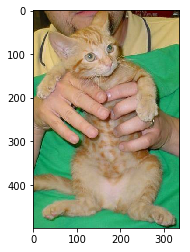

In [7]:
files = os.listdir(f'{PATH}valid/cats')[:5]
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

- 其中的数据为三维形式, 可通过命令查看:

In [8]:
img[:4, :4]

array([[[60, 57, 12],
        [60, 57, 14],
        [63, 55, 18],
        [63, 54, 21]],

       [[56, 53,  8],
        [56, 53, 10],
        [59, 51, 14],
        [60, 51, 18]],

       [[52, 49,  4],
        [52, 49,  6],
        [55, 47, 11],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [53, 45,  9],
        [53, 44, 13]]], dtype=uint8)

- 这里要注意文件侠的结构，以便和后面的训练进行配合：

In [12]:
os.listdir(PATH)

['models', 'sample', 'test1', 'tmp', 'train', 'valid']

- 其中train、valid、test分别存放了训练数据、验证数据、测试数据; 其下又有各类图片的子目录. models是后续调用`learn.save()`时模型参数存放的目录. 对本例而言train目录下有cats、dogs两个子目录, 每个子目录下大致有11500张图片. valid目录下，cats、dogs分别有1000张图片。 上述路径存储方式是一种通用的目录结构，为大多数深度学习框架所支持.

In [13]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

### 训练数据

- 按照指定的网络架构, 根据训练数据, 构造分类器. 本例中采用了在ImageNet数据集上训练好的分类网络, 因此采用`pretrained()`方法. 这样, 只需训练最后的全连接层即可. 由于只需训练最后面的全连接层, 因此由已有的卷积核参数生成的结果保持不变, 所以在此设置`precompute=True`.

- 这里采用的是`resnet34`模型, 具体可参见[这里](https://github.com/KaimingHe/deep-residual-networks).

- `fit`方法的第一个参数`0.01`为深度学习网络的超参数: 学习速率, 即每次优化损失函数时, 沿梯度方向前进的步长.

- `fit`方法的第二个参数`2`, 在此可以简单地理解为将遍历数据集两次. 该值和后续的一个额外参数cycle_len会有关联。

In [9]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.04764    0.030804   0.988     
    1      0.043333   0.030177   0.9905                                                                             



[0.030177337527275087, 0.9905]

### 分析结果

- `data`中包含了一些常用信息：

In [10]:
# 返回数据的标签
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
# 返回类别
data.classes

['cats', 'dogs']

- 基于训练的模型，可以进行预测：

In [16]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

- 预测的结果以对数的形式进行展示:

In [15]:
log_preds[:10]

array([[ -0.0003 ,  -8.10387],
       [ -0.00007,  -9.57193],
       [ -0.     , -12.63996],
       [ -0.00017,  -8.66239],
       [ -0.00055,  -7.50239],
       [ -0.00001, -11.577  ],
       [ -0.     , -12.76961],
       [ -0.00002, -11.00141],
       [ -0.00022,  -8.40815],
       [ -0.00001, -11.57626]], dtype=float32)

需要对结果进行转换，两列分别代表这一样本在各类别中的概率:

In [23]:
probs = np.exp(log_preds)  # pr(dog)
probs[:10]

array([[0.9997 , 0.0003 ],
       [0.99993, 0.00007],
       [1.     , 0.     ],
       [0.99983, 0.00017],
       [0.99945, 0.00055],
       [0.99999, 0.00001],
       [1.     , 0.     ],
       [0.99998, 0.00002],
       [0.99978, 0.00022],
       [0.99999, 0.00001]], dtype=float32)

In [24]:
probs = np.exp(log_preds[:, 1])  # pr(dog)
probs[:10]

array([0.0003 , 0.00007, 0.     , 0.00017, 0.00055, 0.00001, 0.     , 0.00002, 0.00022, 0.00001],
      dtype=float32)

In [22]:
probs[-10:]

array([0.99392, 0.99997, 0.99991, 1.     , 0.99999, 0.99987, 0.99921, 0.99999, 0.99991, 1.     ],
      dtype=float32)

也可以通过下面的方式, 返回概率比较大的情形时的列号:

In [25]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
preds

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

- 创建函数用于显示图片, 便于了解模型的实际效果:

In [26]:
def rand_by_mask(mask):
    return np.random.choice(
        np.where(mask)[0], min(len(preds), 4), replace=False)


def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y) == is_correct)


def plots(ims, figsize=(12, 6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims) // rows, i + 1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])


def load_img_id(ds, idx):
    return np.array(PIL.Image.open(PATH + ds.fnames[idx]))


def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds, x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(
        imgs, rows=1, titles=title_probs,
        figsize=(16, 8)) if len(imgs) > 0 else print('Not Found.')

#### 验证效果

- 随机显示正确分类的图片:

Correctly classified


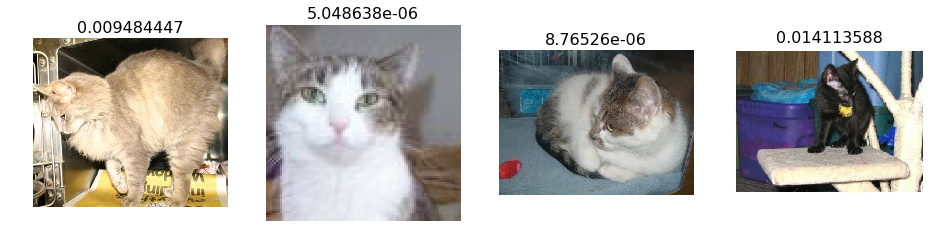

In [27]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

- 随机显示错误分类的图片:

Incorrectly classified


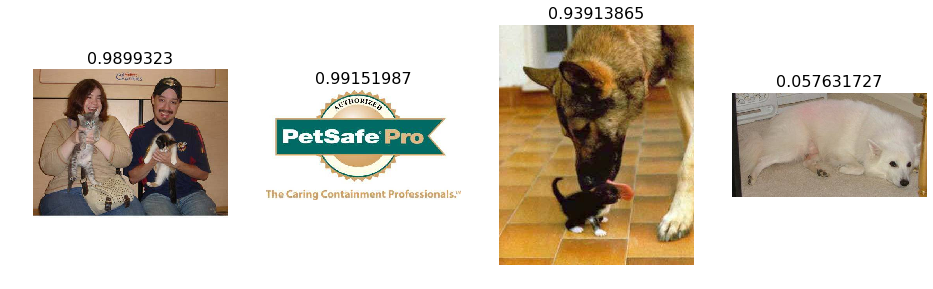

In [29]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

- 分类准确, 概率最高的图片:

In [30]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]


def most_by_correct(y, is_correct):
    mult = -1 if (y == 1) == is_correct else 1
    return most_by_mask(
        ((preds == data.val_y) == is_correct) & (data.val_y == y), mult)

Most correct cats


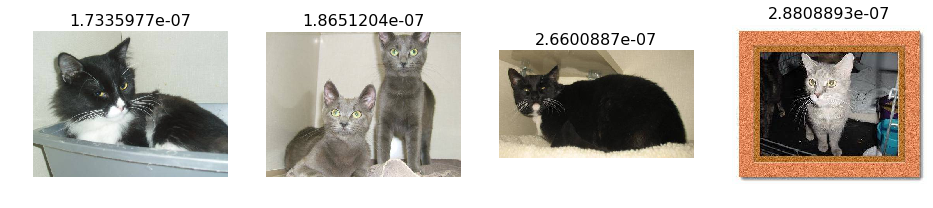

In [32]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


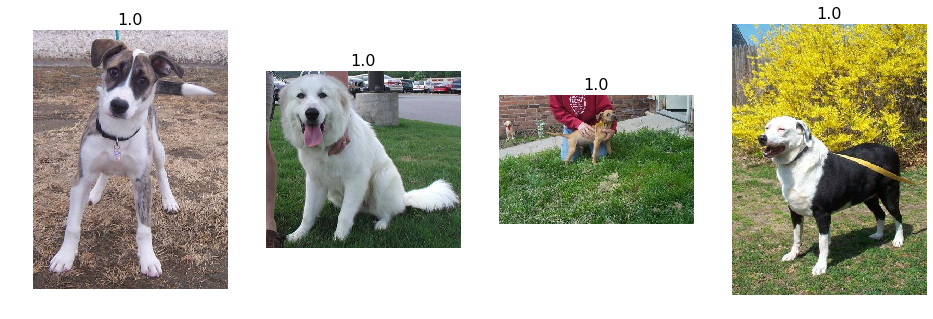

In [33]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

- 分类错误, 概率最低的图片:

Most incorrect cats


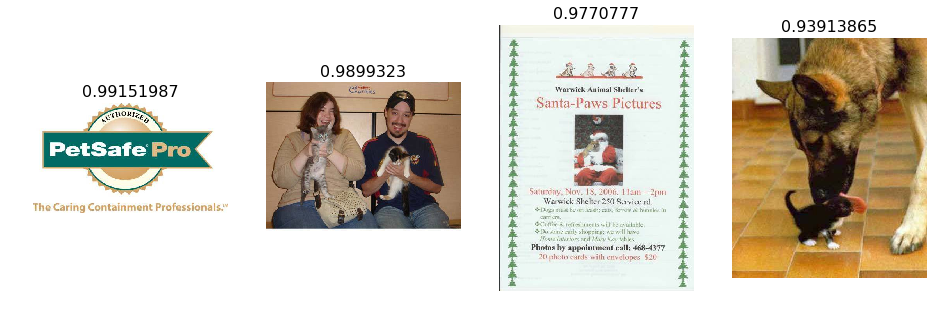

In [34]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


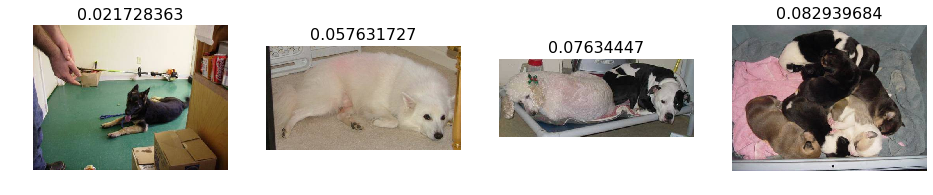

In [35]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

- 最不确定的分类结果, 即概率在0.5附近的情况:

Most uncertain predictions


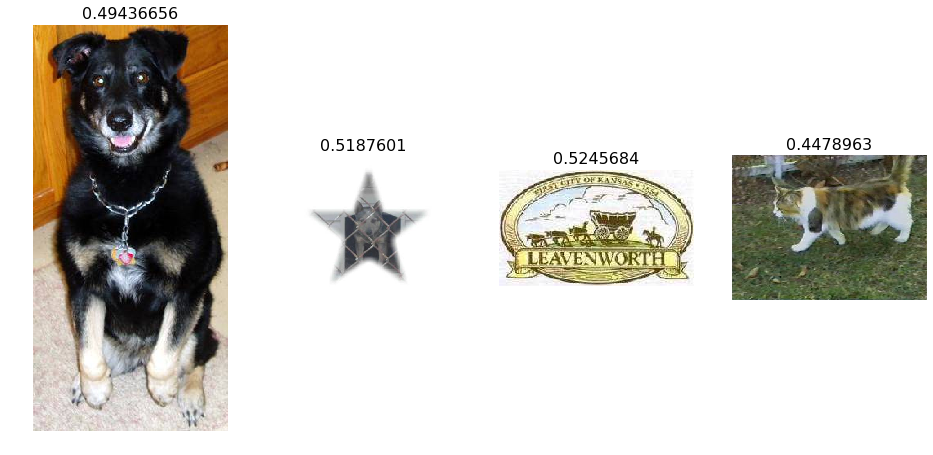

In [36]:
most_uncertain = np.argsort(np.abs(probs - 0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

### 调整学习速率

- 学习速率是最难设定的参数, 其能显著影响模型性能. 
- 方法`learn.lr_find()`用于搜索最优的学习速率, 思想来自于2015年的一篇文章[Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186), 其思想是先将速率设定为非常小的值, 然后慢慢增大, 直到损失函数停止下降.

In [38]:
# 重新设定学习器
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find()

 85%|███████████████████████████████████████████████████████          | 305/360 [01:48<00:12,  4.56it/s, loss=0.319]

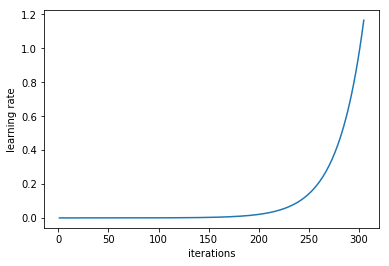

In [39]:
# learn的属性sched中包含历次得到的学习速率
learn.sched.plot_lr()

- 这里的迭代是指的一次`SGD`或小批量迭代, 而一个`epoch`可能会包含多个迭代.

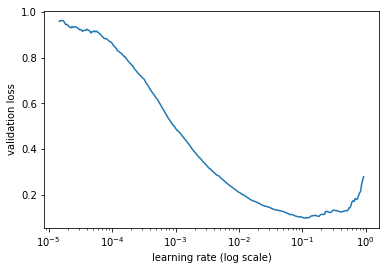

In [40]:
# 损失函数的变化
learn.sched.plot()

- 在`lr=1e-2 (0.01)`时, 损失函数仍然在下降, 这就是上文所采用的速率.
- 需要注意到, 随着运算的进行, 最优学习速率是会改变的, 所以有时需要重新运行此函数.

## 提升模型

### 数据增强

- 如果只是在原数据上进行更多的训练, 可能就会产生过拟合, 因为这样会造成识别更多训练集的特点, 对于在测试集上的泛化是不利的. 这里引入一种数据增强的方式, 但并不会影响图片本身所要表达的事物, 比如水平翻转, 放缩以及旋转.

- 本文是在已有的图片卷积网络的基础上构建新网络，而已有的图片卷积网络通常是在尺寸为224×224或是299×299的图片集上进行训练的，因此，Fast.AI会对输入图片进行裁剪，以使之满足网络输入层的要求。这一操作是通过在获取图片分类器时，传入参数tfms来实现的。如上节所示：
```python
data = ImageClassfierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
```
但事实上，裁剪后的图像可能会丢失关键特征区域（如猫或狗的脑袋），因此需要对输入图片进行额外的修饰，使得所构建的网络尽可能地"看全图片"。

In [41]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)


def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x, _ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

- 在`tfms_from_model`中引入参数`aug_tfms`(augmentation transforms), 其包含了一系列可用于随机改变图片的函数. 对于主要从侧面拍摄的照片(例如, 大多数狗和猫的照片, 而不是从上到下拍摄的照片, 例如卫星图像), 可以使用预定义的函数列表`transforms_side_on`. 也可以通过参数`max_zoom`指定图片放缩的幅度, 即最大不超过1.1倍.

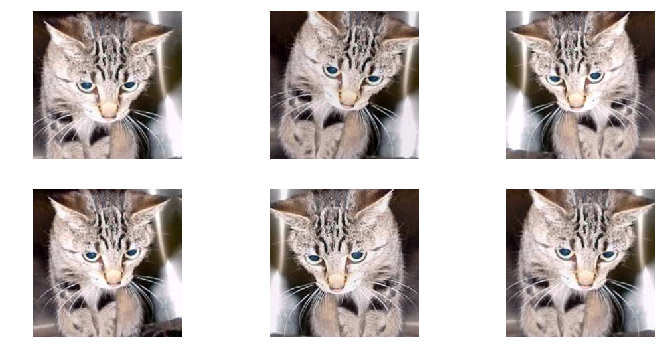

In [42]:
ims = np.stack([get_augs() for i in range(6)])
plots(ims, rows=2)

- 根据上面的数据增加方法, 重新进行训练

In [43]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.041123   0.030777   0.988     


[0.0307765571475029, 0.988]

- 由于输入图片被改变, 由已有的卷积核所生成的结果应发生相应改变, 因此设置`precompute=False`. 当调用方法`fit`时, 仅有最后一层的权重系数会被更新, 其它层都是被冻结的, 可以用如下方式重新修改:

- 在随机梯度下降算法中, 选取某一点做出发点, 然后针对损失函数逐步优化相应参数. 由于开始时网络对最优解并无信息, 因此会随机的选择参数值做为出发点. 期望优化算法能够有效地进行梯度下降, 从而尽快的找到最优解. 但随着数据的投喂, 网络对最优解也有了一定的认知, 而此时的参数估计值也越来越接近最优解. 则期望优化算法不要跨太大的步子, 从而避免在最优解附近震荡. 基于这样的理念, 随机梯度下降算法将使用**逐步减小学习速率(Learning Rate Annealing)**的方法。
- 另一方面, 期望最终训练出的网络, 有稳定的泛化能力, 即输入数据有微小变化时, 其输出结果不至于变化的太离谱. 这就要求训练所得的参数落在损失函数的较为平稳的区域. 为达到这一目的, 与逐步减小学习速率相反, 会定期增大学习速率, 以跳出底部尖锐(不稳定)的低损失函数区域. 这就是随机梯度算法中的学习速率重置技巧(SGDR, Stochastic Gradient Descent with Restarts), 详情可见文章[Snapshot Ensembles](https://arxiv.org/abs/1704.00109). 如下图所示:<img src="lr.jpg" width=550/>


In [44]:
learn.precompute = False
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.041991   0.030444   0.9885    
    1      0.041338   0.029116   0.988                                                                              
    2      0.048849   0.029138   0.9885                                                                             


[0.029138397097587584, 0.9885]

- 其中`cycle_len`指定了学习速率重置的周期, 本例中即在遍历一次图片集后, 重置学习速率. 参数`3`的说明: `3`表示学习速率重置次数. 使用语句`learn.sched.plot_lr()`可以画出学习速率的变化曲线：

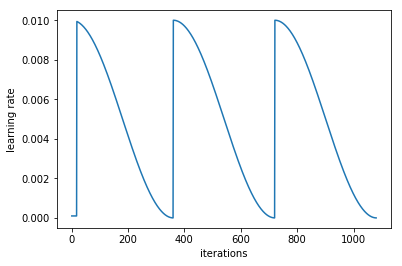

In [45]:
learn.sched.plot_lr()

- 经过上面的计算发现, 在测试集上的精度基本没有提高, 这说明最后一层的训练已经没有必要再做了. 既然已经没有改进的必要, 就可以将这个模型保存起来, 以后直接调用即可, 而不需要重新计算.

In [46]:
learn.save('224_lastlayer')
learn.load('224_lastlayer')

### 微调和差分学习速度退火

- 在训练好一层之后, 就可以尝试去训练其它层了. 这时需要去解冻其它层

In [48]:
learn.unfreeze()

- 由于之前的网络各层都已经被训练好去用于imagenet的照片, 只有最后一层是随机初始化的, 故这里要谨慎微调不要破坏这些已经调整好的权重参数.
- 为了达到这个目的, 采用`differential learning rates`方式, 就是在前几层设定的学习速率为`1e-4`, 中间几次是`1e-3`, 全连接层(FC layers)是`1e-2`

In [50]:
lr = np.array([1e-4, 1e-3, 1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.02226    0.019886   0.991     
    1      0.024929   0.020554   0.9915                                                                             
    2      0.023509   0.02312    0.9915                                                                             
    3      0.024793   0.016961   0.993                                                                              
    4      0.012406   0.019121   0.993                                                                              
    5      0.015487   0.018587   0.9915                                                                             
    6      0.012023   0.018002   0.9925                                                                             


[0.018002333730459213, 0.9925]

- 在这里引入了参数`cycle_mult`, 

## 分析结果
### 混淆矩阵